In [1]:
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import fmax as fm
import numpy as np

# Some plotting functions

In [2]:
def plot_posterior_predictive(fcast_model, label, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.posterior_predictive_samples
    index = fcast_model.train_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.01, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.1, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.9, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.99, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)

    t_index = [1968+i for i in range(len(index))]

    axs.fill_between(t_index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    axs.fill_between(t_index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    axs.plot(t_index, medians, label="Median")
    axs.plot(t_index, fcast_model.train_data, color="red", label="Training")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [3]:
def plot_forecast(fcast_model, test_data, label, actual, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)
        
    # axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    # axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    
    axs.plot(index, medians, label="Median")
    axs.plot(fcast_model.train_index, fcast_model.train_data, color="red", label="Training")
    axs.plot(fcast_model.fcast_index, test_data, color="black", label="Tryfos")
    axs.plot(fcast_model.fcast_index, actual, color="green", label="Actual")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [4]:
def plot_forecast_fin(fcast_model, test_data, label, actual, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [5]:
def plot_forecast_small(fcast_model, test_data, label, actual):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(8,5))
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    #axs.set_xlabel("Period")
    #axs.set_ylabel("Record")
    #axs.set_title(label)

    fig.tight_layout()

    return fig

# Results for Gaussian

WARNING (theano.tensor.opt): Optimization Warning: The Op erfcx does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 140 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 139 seconds.
The number of effective samples is smaller than 25% for some parameters.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 141 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 173 seconds.
The number of effective samples is smaller than 25% for some parameters.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 139 seconds.
The acceptance probability does not match the target. It is 0.9377420108843653, but should be close to 0.99. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.970343019620402, but should be close to 0.99. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 150 seconds.
The acceptance probability does not match the target. It is 0.9573196913497241, but should be close to 0.99. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


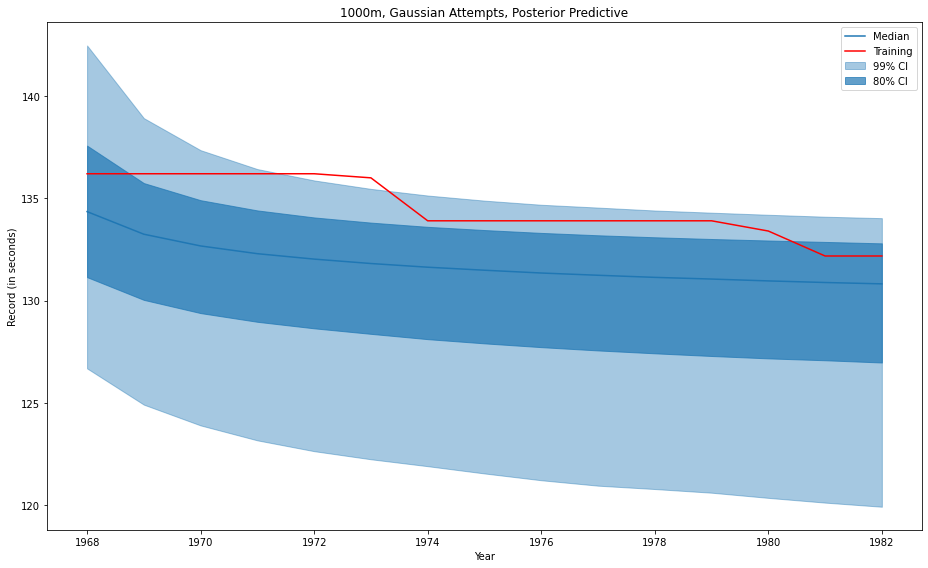

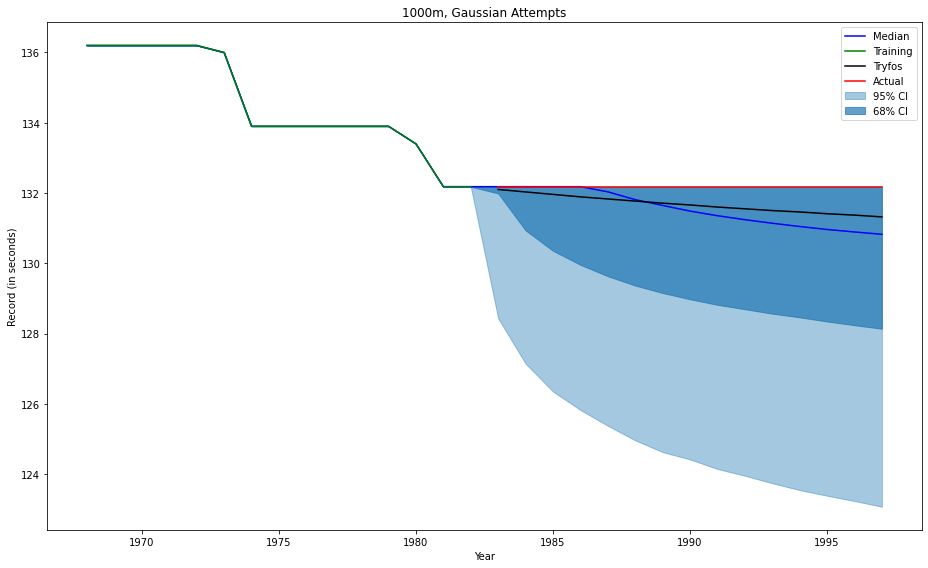

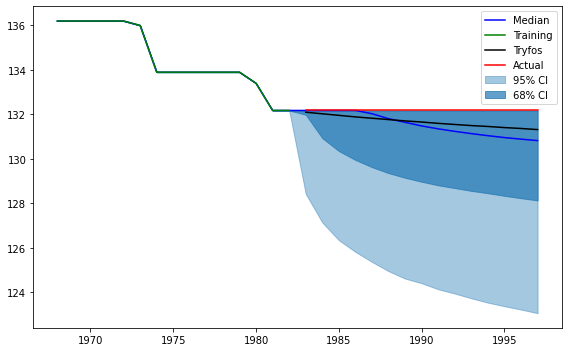

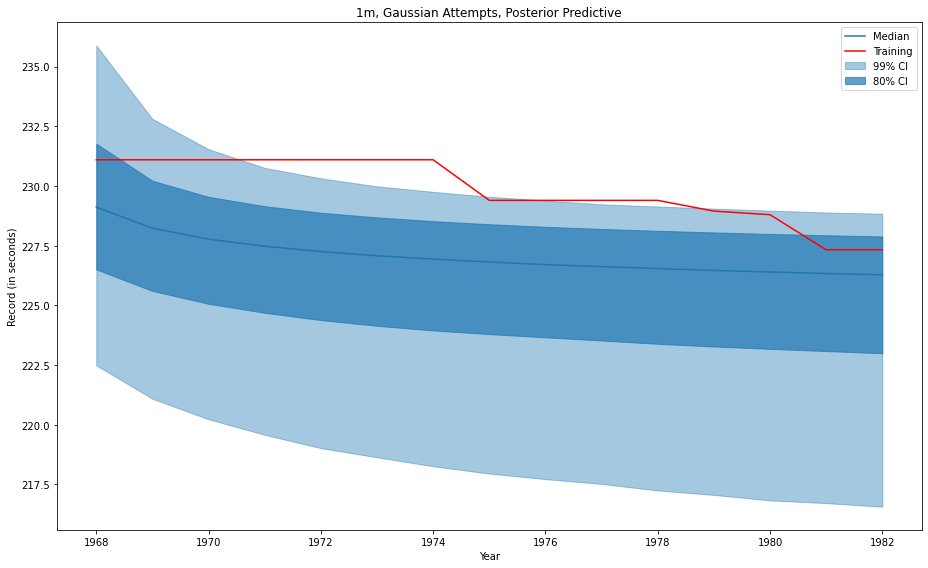

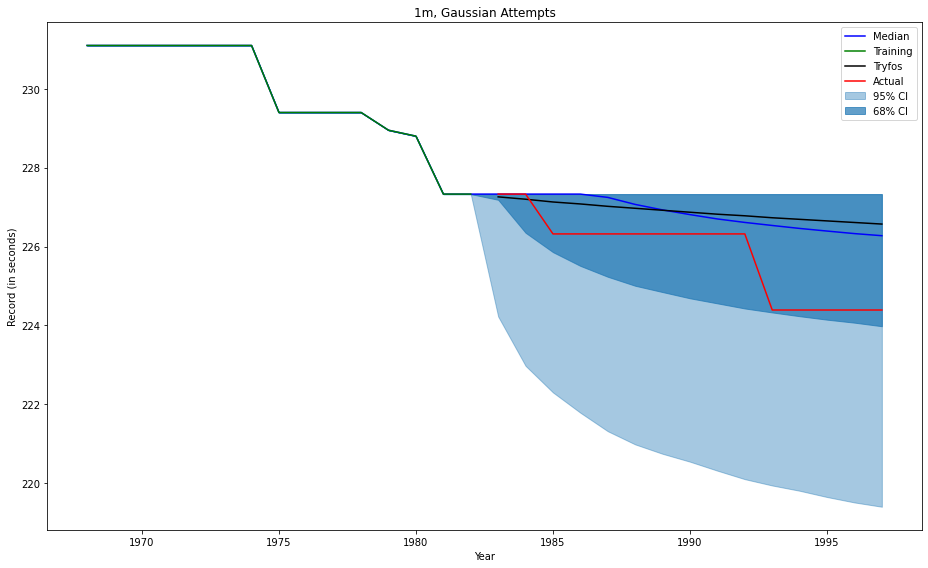

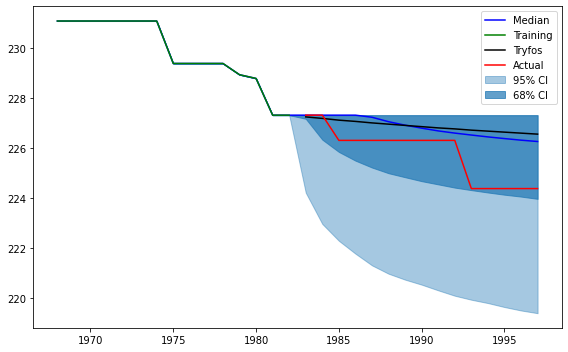

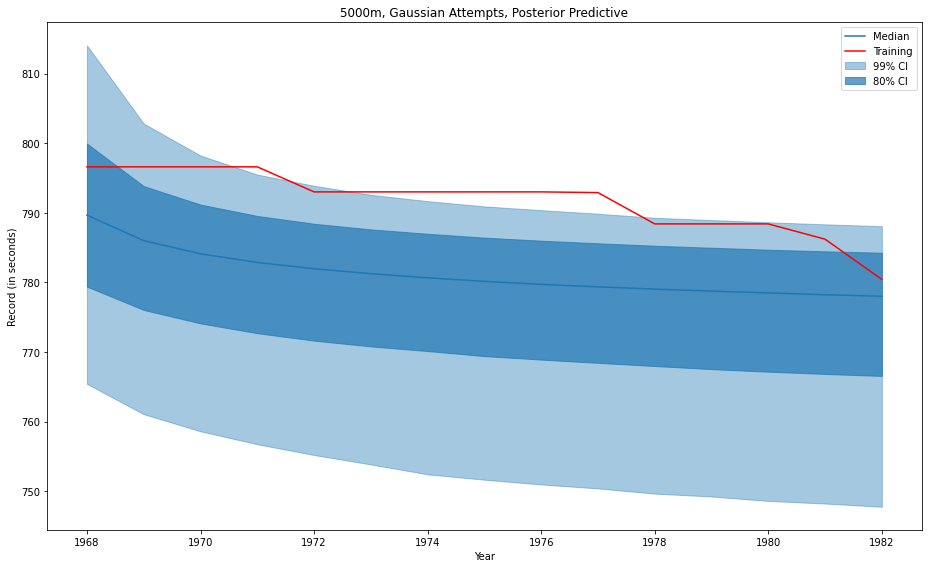

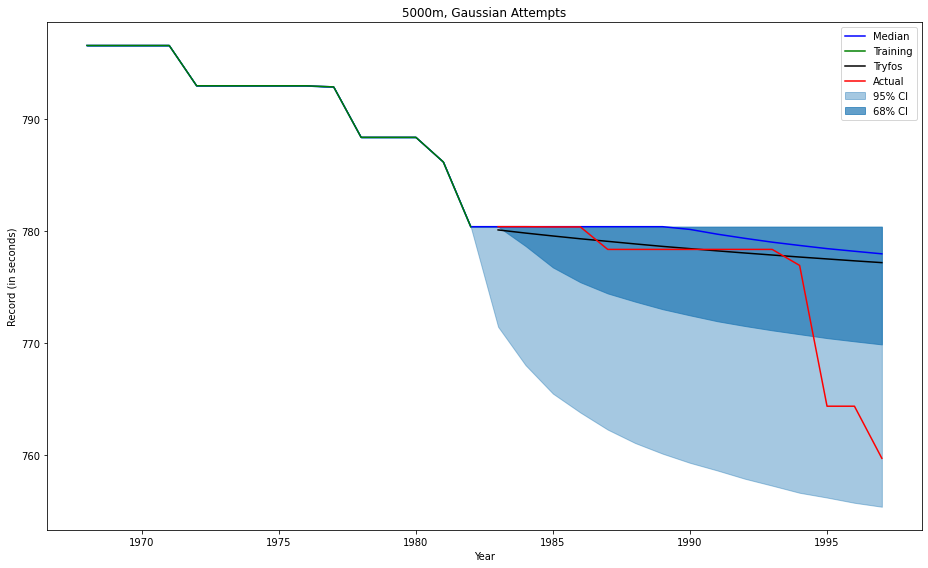

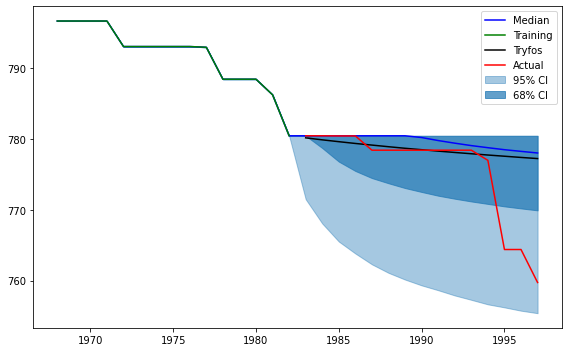

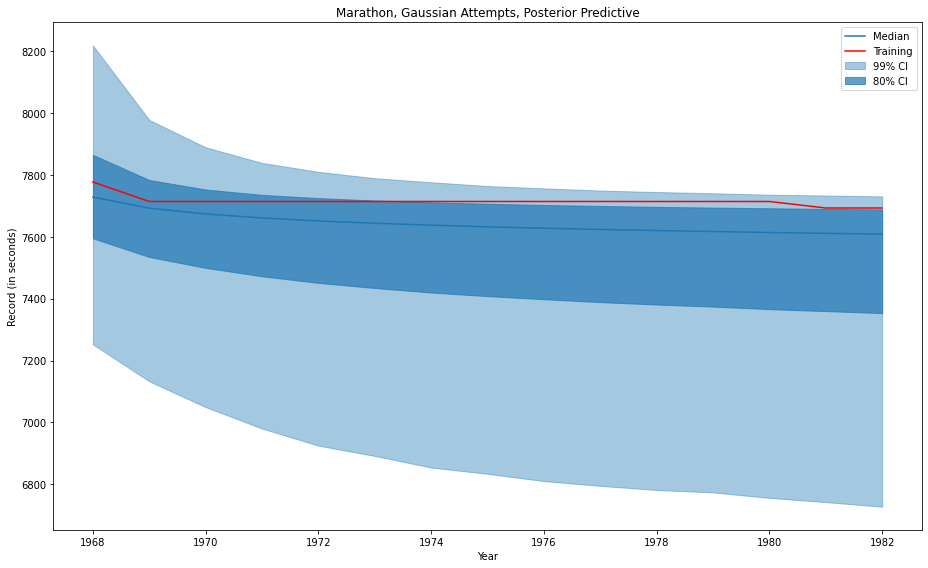

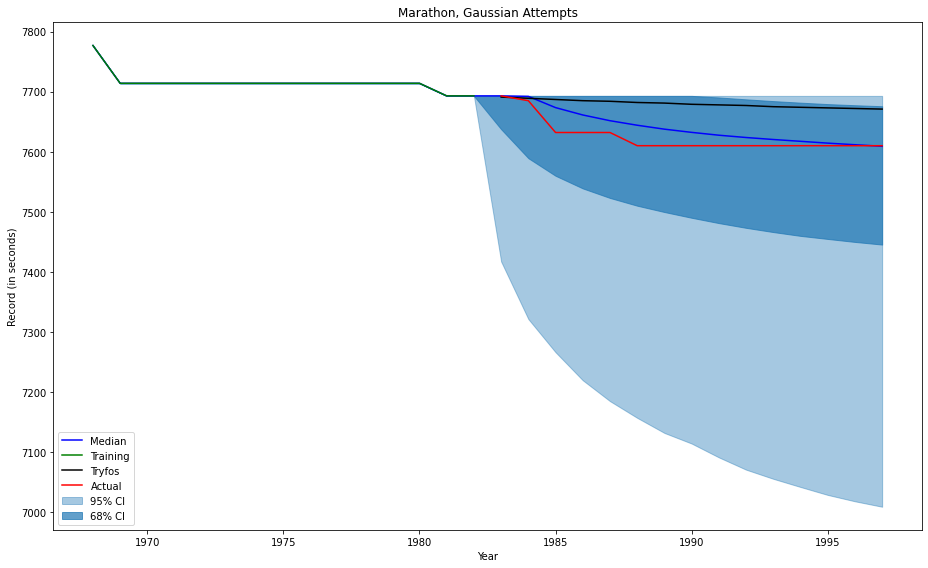

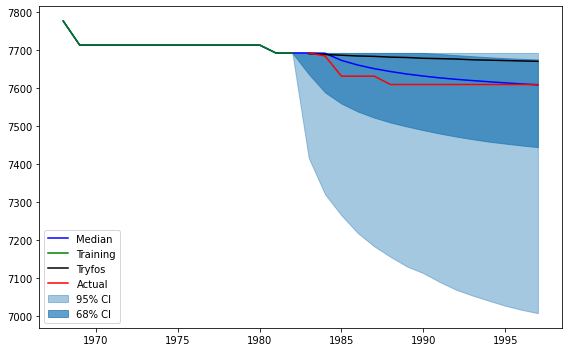

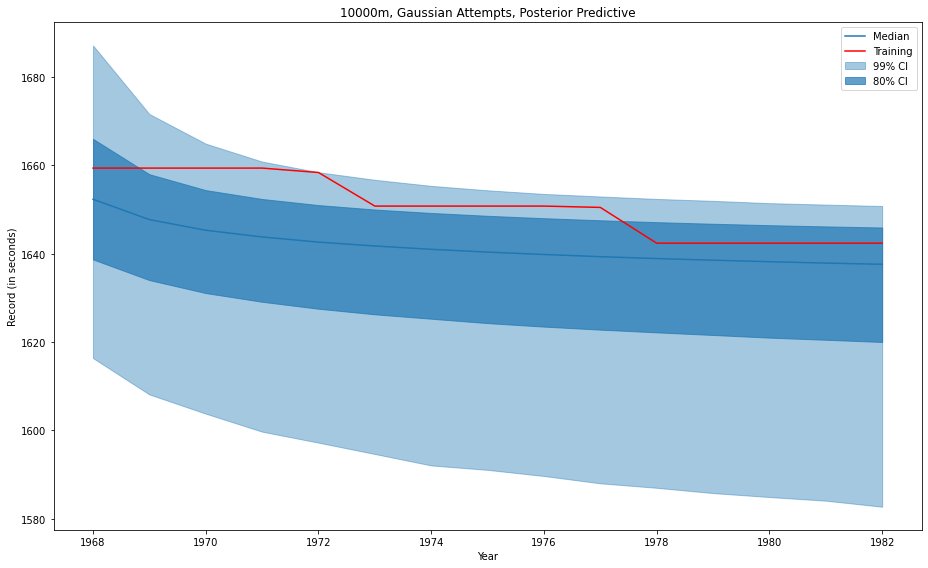

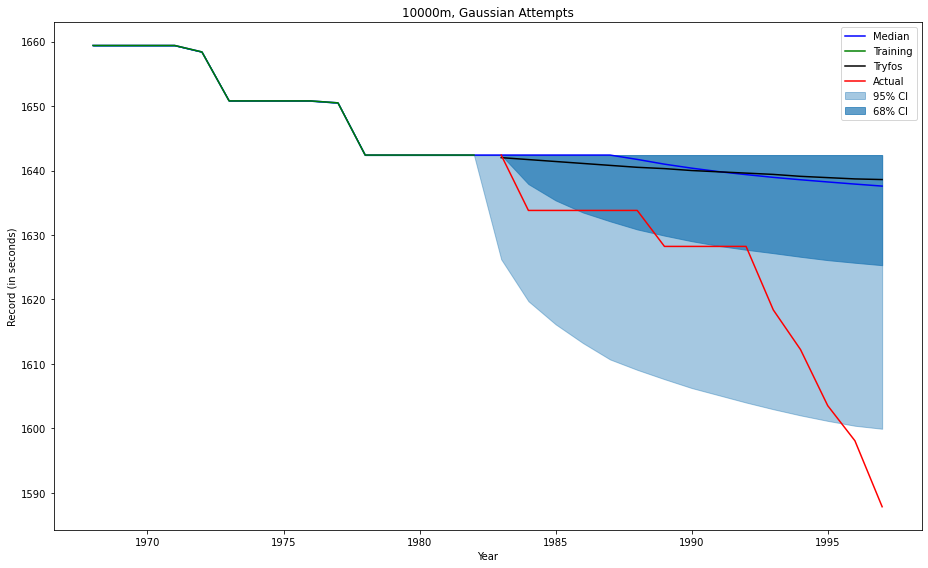

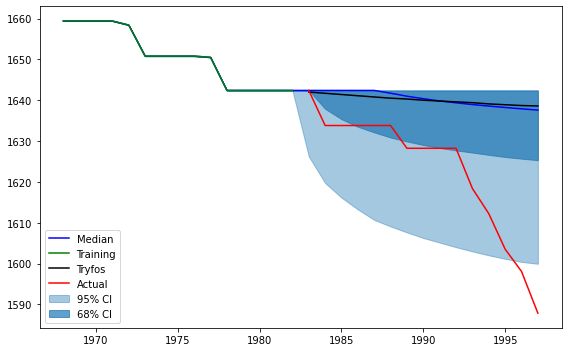

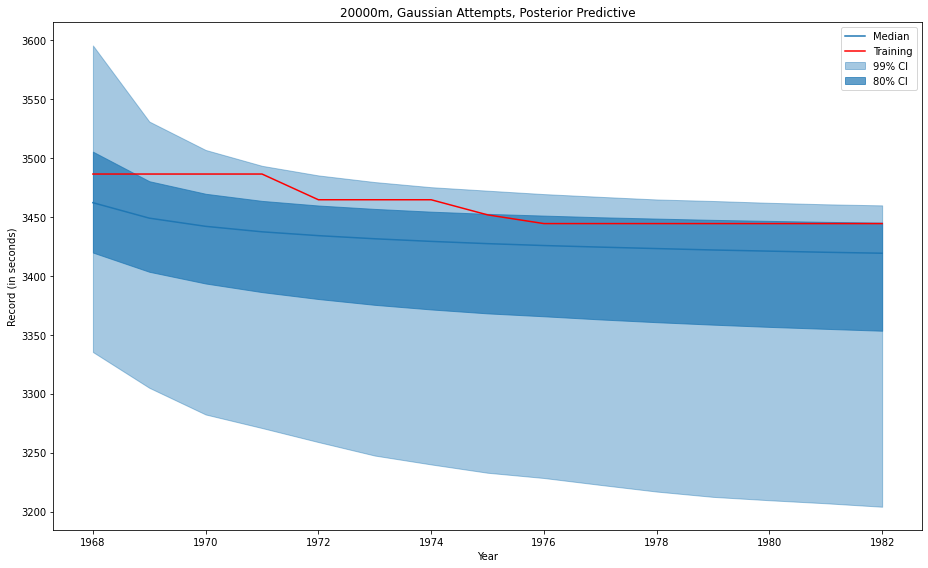

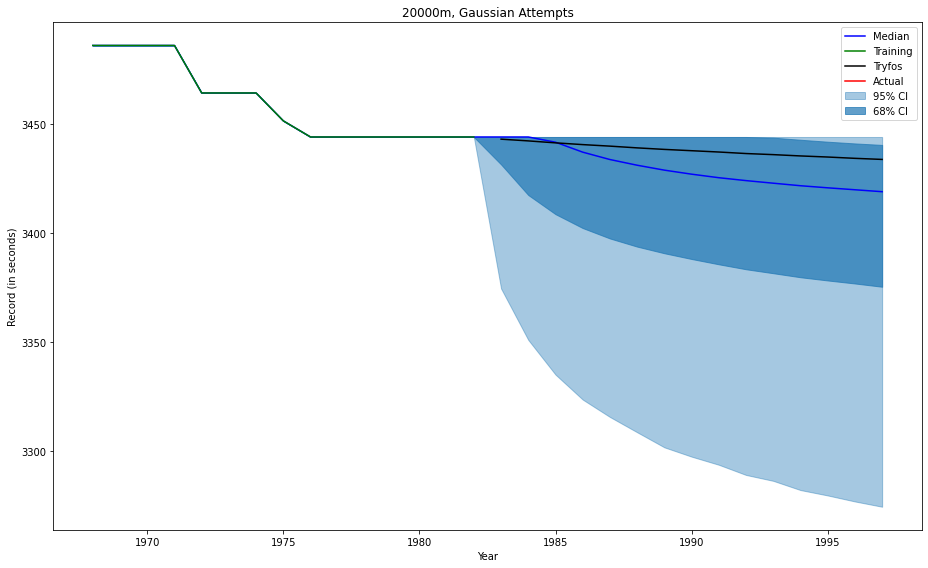

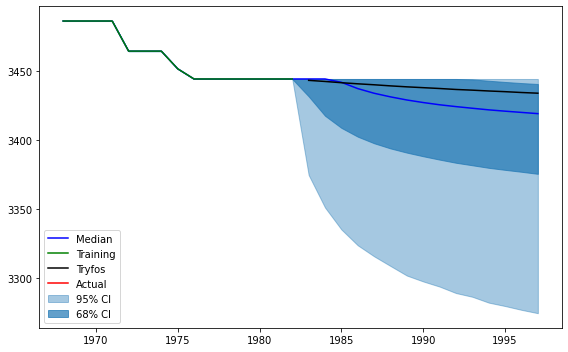

In [16]:
whiches = ["1000m", "1m", "5000m", "Marathon", "10000m", "20000m"]
#whiches = ['20000m']
#whiches = ["1000m", "1m", "5000m", "Marathon", "10000m"]
#whiches = ["1000m", "1m", "5000m", "Marathon"]
#whiches = ["1000m"]
#whiches = ["1000m"]
#whiches = ['1m']

mses = {}
avg_log_probs = {}

fails = []

for which in whiches:
  try:
    df = pd.read_csv("tryfos_data.csv")
    years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

    actual_df = pd.read_csv("tryfos_actual.csv")
    _, actual_records = actual_df["Year"].values, actual_df[which].values

    training_years = years[:15]
    training_records = records[:15]
    tryfos_years = years[15:]
    tryfos_fcast = records[15:]

    prior_parameters = {
              'mu' : {
                'mean' : training_records[0],
                'std' : 0.05*training_records[0],
              },
              'sigma' : {
                'lam' : 1.0/(0.05*training_records[0])
              }
            }

    model = fm.ForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="gaussian", 
                                kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)
                                
    model.fit(chains=10, draws=5000)
    model.posterior_predictive()
    model.forecast()

    # MSE calculation
    median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
    bayes_mse = fm.mse(median, model.fcast_test_data)
    tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
    baseline_fcast = training_records[-1]*np.ones_like(model.fcast_test_data)
    baseline_mse = fm.mse(baseline_fcast, model.fcast_test_data)
    mses[which] = (bayes_mse, tryfos_mse, baseline_mse)

    # Average logp
    avg_log_probs[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])


    # Plots
    fig = plot_posterior_predictive(model, f"{which}, Gaussian Attempts, Posterior Predictive")
    fig.savefig(f"gauss_results/{which}_gaussian_attempts_post_pred.png")

    # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gaussian Attempts, Forecast", actual_records)
    # fig.savefig(f"{which}_gaussian_attempts_forecast.png")

    fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Gaussian Attempts", actual_records)
    fig.savefig(f"gauss_results/final_{which}_gaussian_attempts_forecast.png")

    fig = plot_forecast_small(model, tryfos_fcast, f"{which}, Gaussian Attempts", actual_records)
    fig.savefig(f"gauss_results/s_final_{which}_gaussian_attempts_forecast.png")


  except:
    print(f"failed for {which}")
    fails.append(which)

In [18]:
mses

{'1000m': (0.6563391112198725, 0.30973333333333847, 0.0),
 '1m': (1.6330507908084508, 1.9230733333333596, 3.425253333333406),
 '5000m': (49.64398484400646, 43.3707066666667, 65.49352666666633),
 'Marathon': (406.64311296845085, 3500.8, 5341.133333333333),
 '10000m': (487.0693986002231, 496.97074666666725, 607.3418133333379),
 '20000m': (nan, nan, nan)}

In [17]:
avg_log_probs

{'1000m': -2.4683618141877988,
 '1m': -12.12381924000759,
 '5000m': -42.77392304808017,
 'Marathon': -26.187432245665985,
 '10000m': -135.91595890118,
 '20000m': nan}

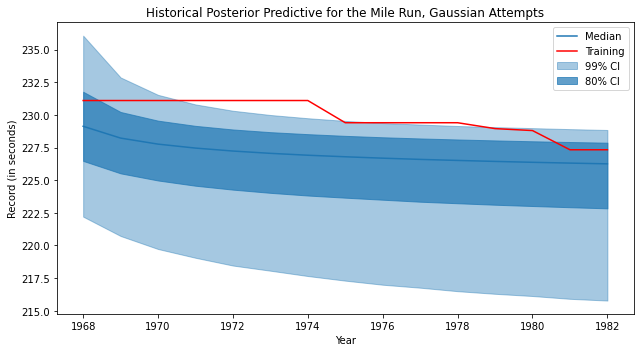

In [58]:
fig = plot_posterior_predictive(model, f"Historical Posterior Predictive for the Mile Run, Gaussian Attempts", figsize=(9,5))
fig.savefig(f"gauss_results/article_gaussian_attempts_post_pred_mile_run.png")

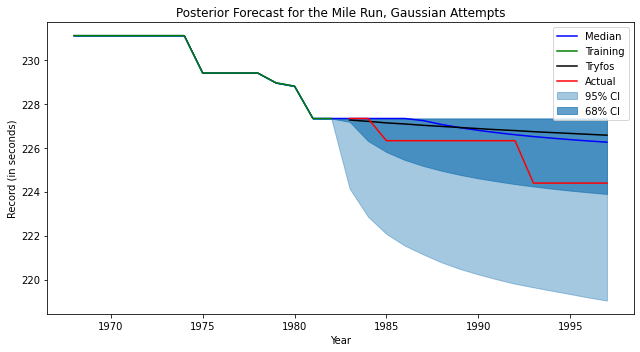

In [59]:
fig = plot_forecast_fin(model, tryfos_fcast, f"Posterior Forecast for the Mile Run, Gaussian Attempts", actual_records, figsize=(9,5))
fig.savefig(f"gauss_results/article_gaussian_attempts_fcast_mile_run.png")

C:\Users\Jonathan\AppData\Local\Temp/ipykernel_225516/1981564619.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


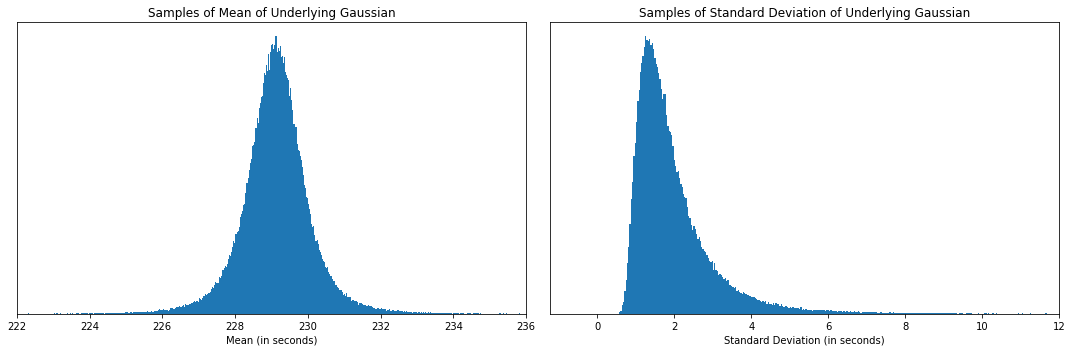

In [80]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].hist(model.trace.posterior.mu.values.flatten(), bins=1000)
axs[0].set_title('Samples of Mean of Underlying Gaussian')
axs[0].set_xlabel('Mean (in seconds)')
axs[0].set_yticks([])
axs[0].set_xlim(222, 236)

axs[1].hist(model.trace.posterior.sigma.values.flatten(), bins=1000)
axs[1].set_title('Samples of Standard Deviation of Underlying Gaussian')
axs[1].set_xlabel('Standard Deviation (in seconds)')
axs[1].set_yticks([])
axs[1].set_xlim(None,12)

fig.tight_layout()

fig.savefig(f"gauss_results/article_gaussian_attempts_posterior_hist.png")

fig.show()

In [82]:
import arviz as az

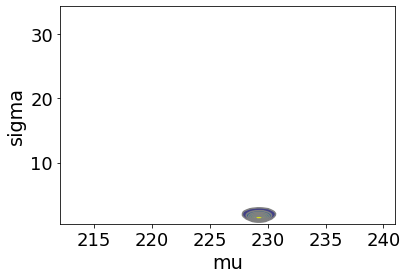

In [88]:
az.plot_pair(model.trace,
            kind='kde',
            var_names=['mu', 'sigma'],
            backend_kwargs
            textsize=18)
    
plt.show()

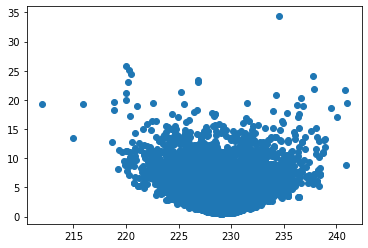

In [81]:
plt.scatter([model.trace.posterior.mu.values.flatten()], model.trace.posterior.sigma.values.flatten())

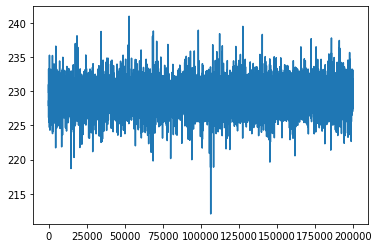

In [73]:
plt.plot(model.trace.posterior.mu.values.flatten())

# Gumbel

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 134 seconds.
The acceptance probability does not match the target. It is 0.9690641846692315, but should be close to 0.99. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


Error: failed on 1000m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 150 seconds.
There were 172 divergences after tuning. Increase `target_accept` or reparameterize.
There were 395 divergences after tuning. Increase `target_accept` or reparameterize.
There were 629 divergences after tuning. Increase `target_accept` or reparameterize.
There were 915 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1142 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1368 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1549 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1788 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1991 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2257 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is s

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 127 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 219 seconds.
There were 787 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1563 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2459 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3473 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4300 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5227 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6097 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6964 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7765 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8539 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples i

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 184 seconds.
There were 805 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1806 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2624 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3639 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4553 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5434 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6372 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7298 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8291 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9210 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples i

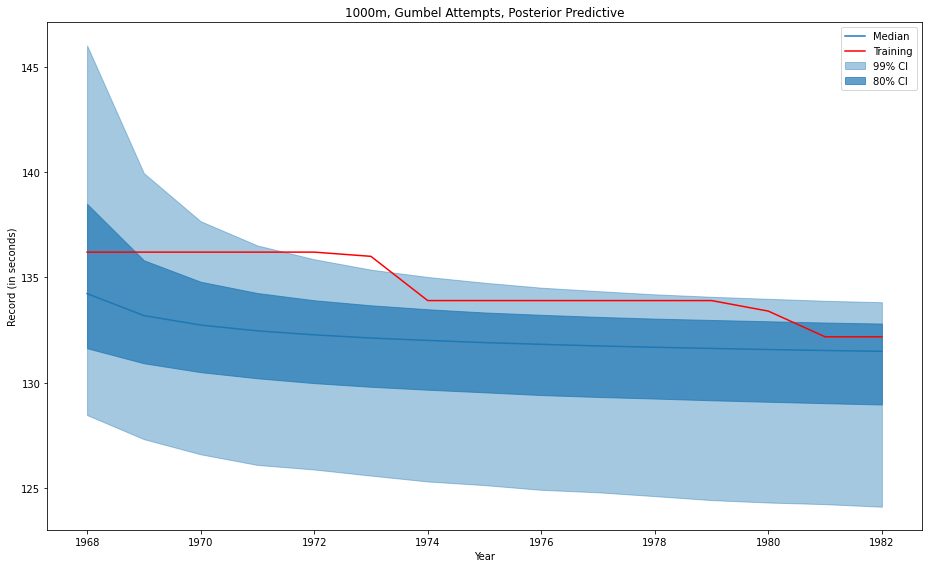

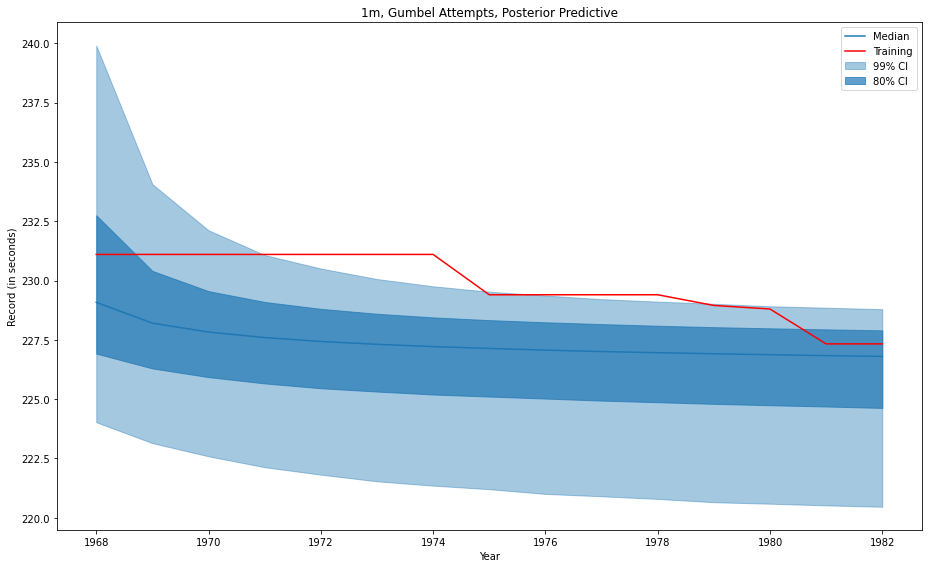

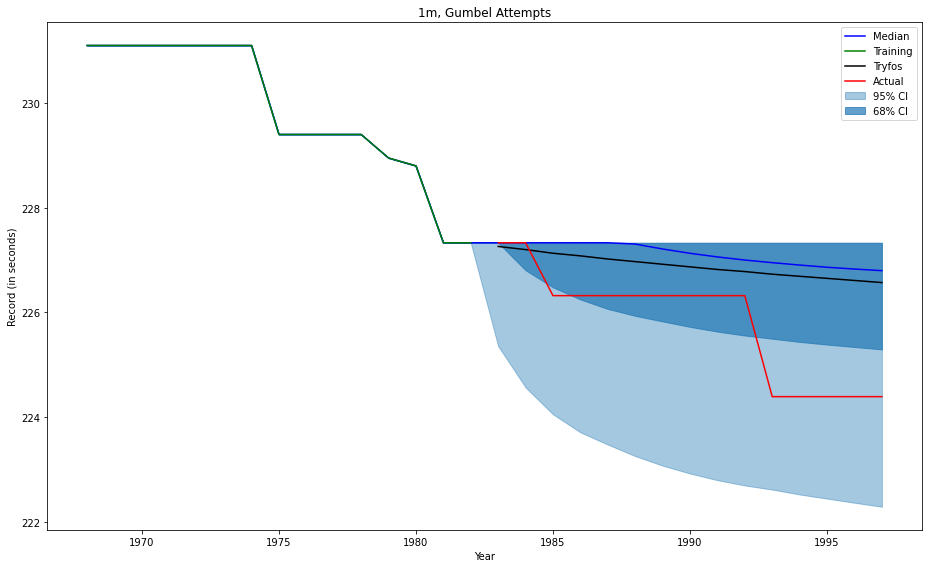

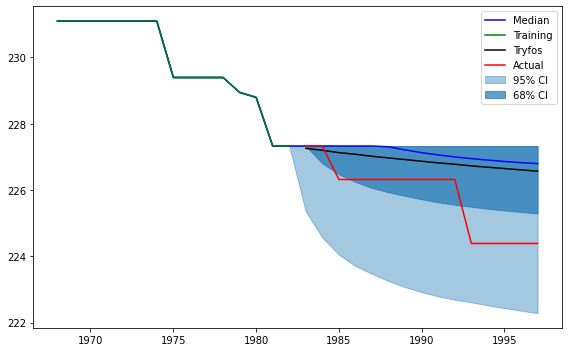

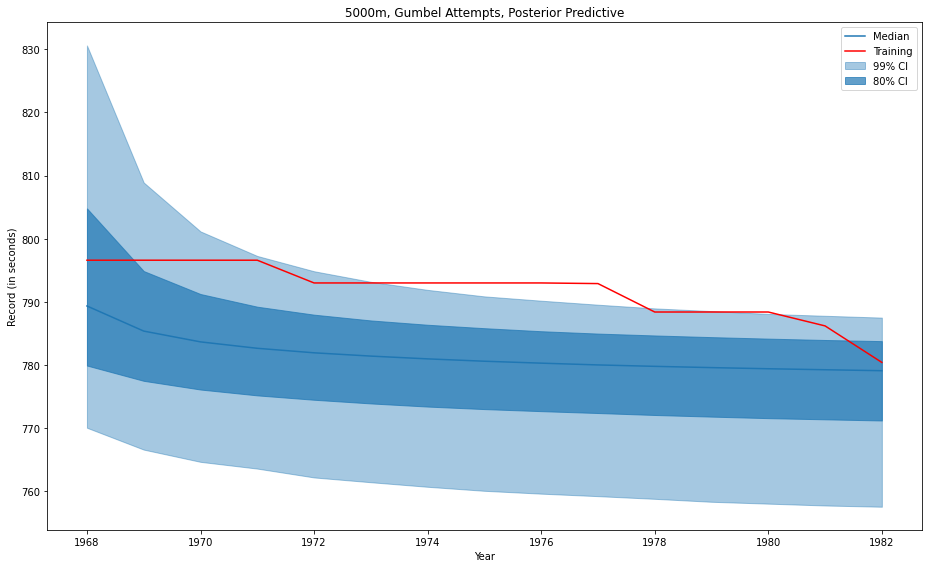

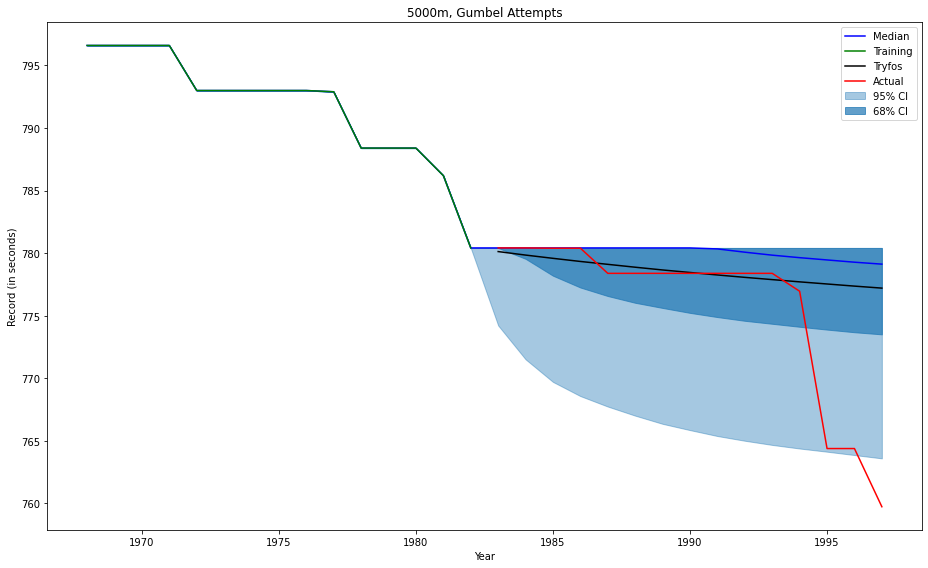

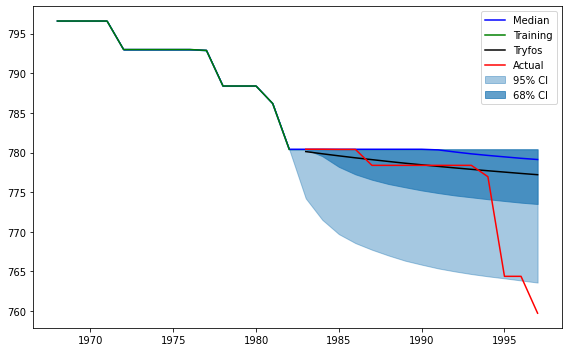

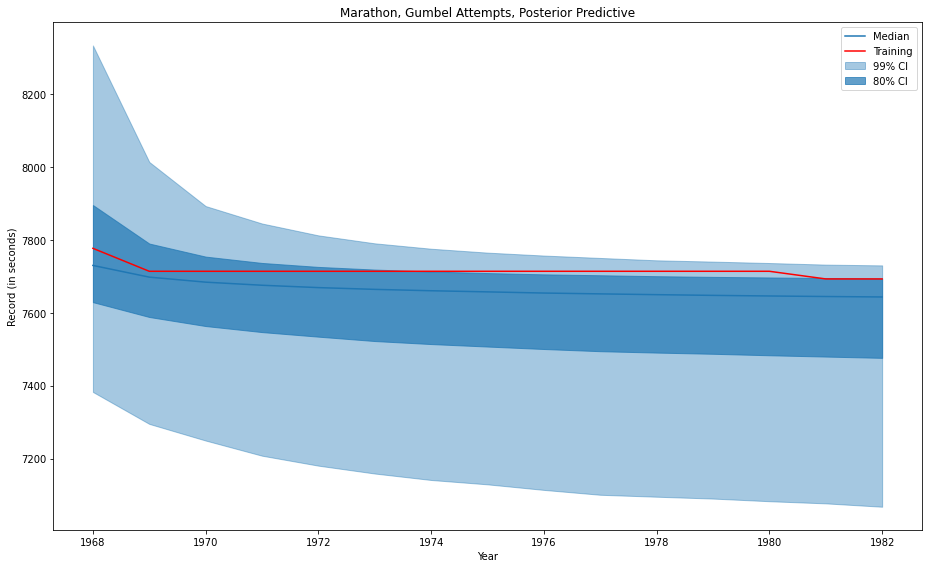

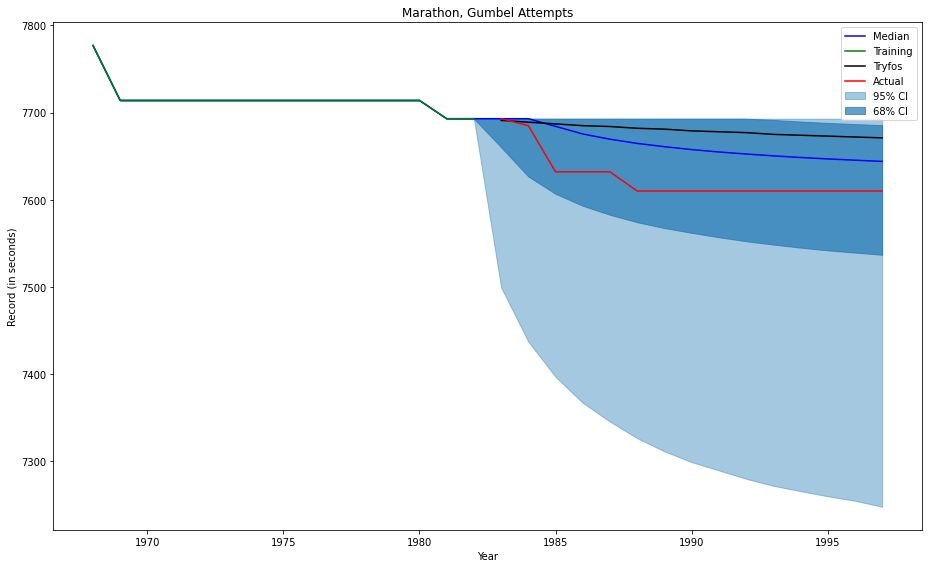

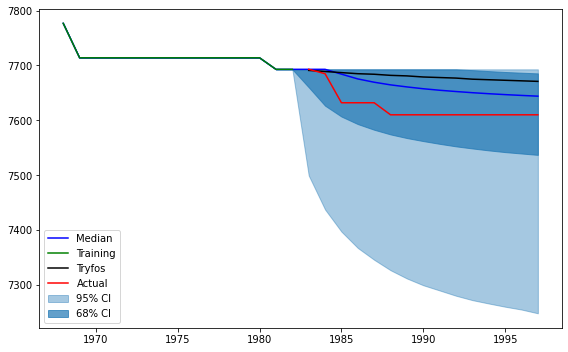

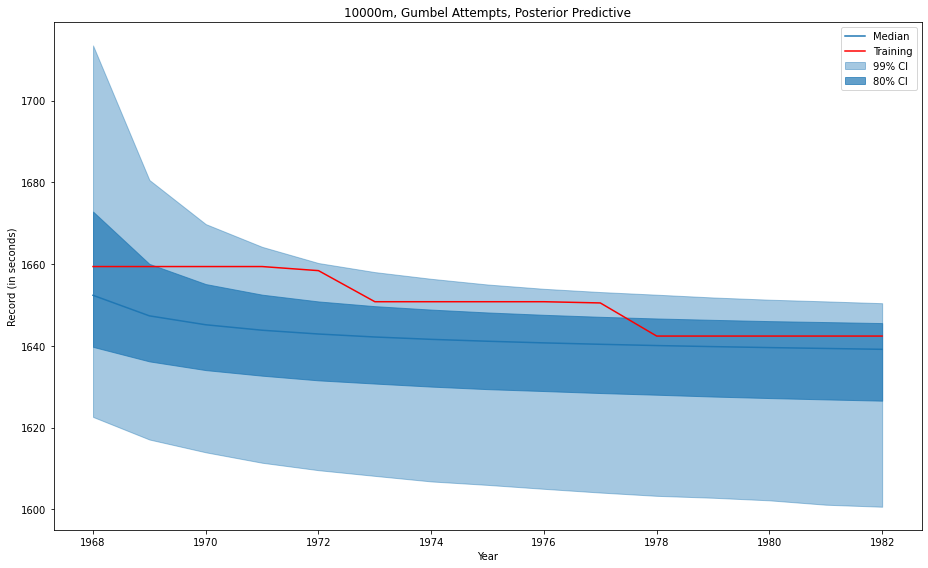

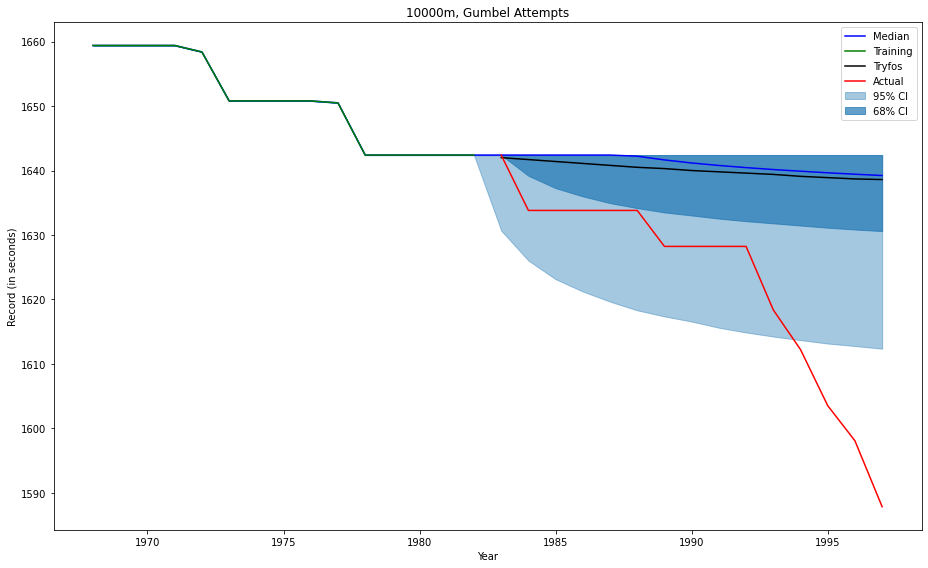

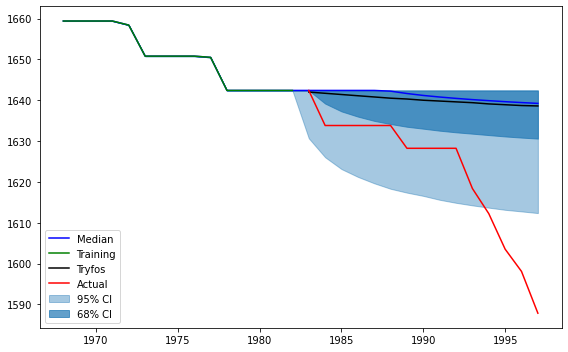

In [9]:
#whiches = ["1m", "5000m", "10000m", "Marathon"]
whiches = ["1000m", "1m", "5000m", "Marathon", "10000m"]
#whiches = []

mses = {}
avg_log_probs = {}

fails = []

#whiches = ["1000m"]
for which in whiches:

    try:

        df = pd.read_csv("tryfos_data.csv")
        years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

        training_years = years[:15]
        training_records = records[:15]
        tryfos_years = years[15:]
        tryfos_fcast = records[15:]

        actual_df = pd.read_csv("tryfos_actual.csv")
        _, actual_records = actual_df["Year"].values, actual_df[which].values

        prior_parameters = {
                'mu' : {
                    'mean' : training_records[0],
                    'std' : 0.05*training_records[0],
                },
                'sigma' : {
                    'lam' : 1/(0.05*training_records[0])
                }
            }

        model = fm.ForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="gumbel", 
                                    kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)
        
        model.fit(chains=10, draws=5000)
        model.posterior_predictive()
        model.forecast()


        # MSE calculation
        median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
        bayes_mse = fm.mse(median, model.fcast_test_data)
        tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
        baseline_fcast = training_records[-1]*np.ones_like(model.fcast_test_data)
        baseline_mse = fm.mse(baseline_fcast, model.fcast_test_data)
        mses[which] = (bayes_mse, tryfos_mse, baseline_mse)

        # Average logp
        avg_log_probs[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])

        # Plots
        fig = plot_posterior_predictive(model, f"{which}, Gumbel Attempts, Posterior Predictive")
        fig.savefig(f"gumbel/final_{which}_gumbel_attempts_post_pred.png")

        # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gumbel Attempts, Forecast", actual_records)
        # fig.savefig(f"{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"gumbel/final_{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_small(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"gumbel/s_final_{which}_gumbel_attempts_forecast.png")



    except:
       print(f"Error: failed on {which}")
       fails.append(which)

In [10]:
mses

{'1000m': (0.15063144970517403, 0.30973333333333847, 0.0),
 '1m': (2.4811836486722183, 1.9230733333333596, 3.425253333333406),
 '5000m': (57.142911296786444, 43.3707066666667, 65.49352666666633),
 'Marathon': (1639.957432177046, 3500.8, 5341.133333333333),
 '10000m': (527.554133065271, 496.97074666666725, 607.3418133333379)}

In [12]:
avg_log_probs

{'1000m': -2.3014952011478047,
 '1m': -35.374294569938726,
 '5000m': -259.7660205991956,
 'Marathon': -35.46411525631085,
 '10000m': -22080.584435070192}

# Weibull

In [ ]:
model = fm.WeibullForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="weibull", 
                            kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)
model.fit(chains=1, draws=10000, tune=3000)
model.posterior_predictive()
model.forecast()

# Weibull

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [beta, alpha]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 201 seconds.
The number of effective samples is smaller than 25% for some parameters.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [beta, alpha]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 257 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [beta, alpha]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 216 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [beta, alpha]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 255 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9355262987947103, but should be close to 0.99. Try to increase the number of tuning steps.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [beta, alpha]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 229 seconds.


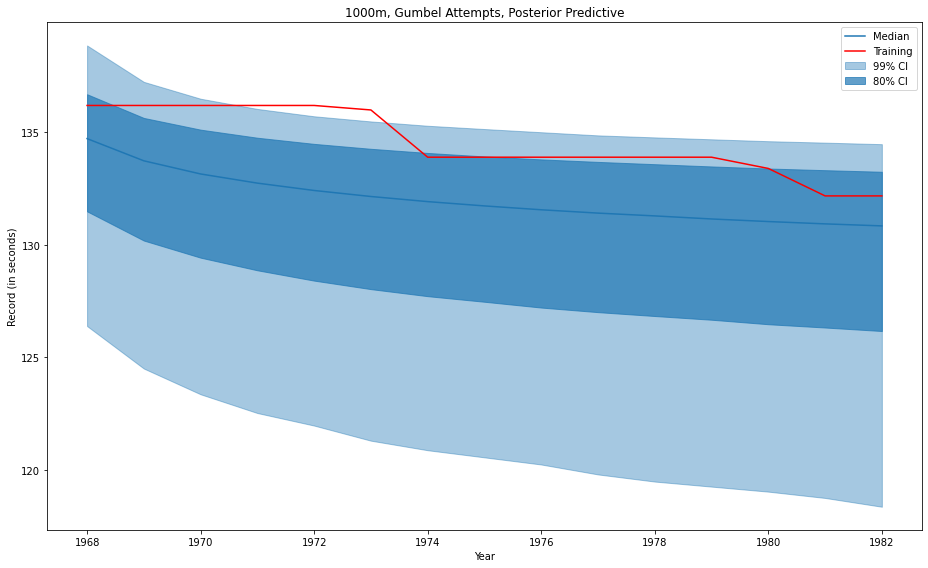

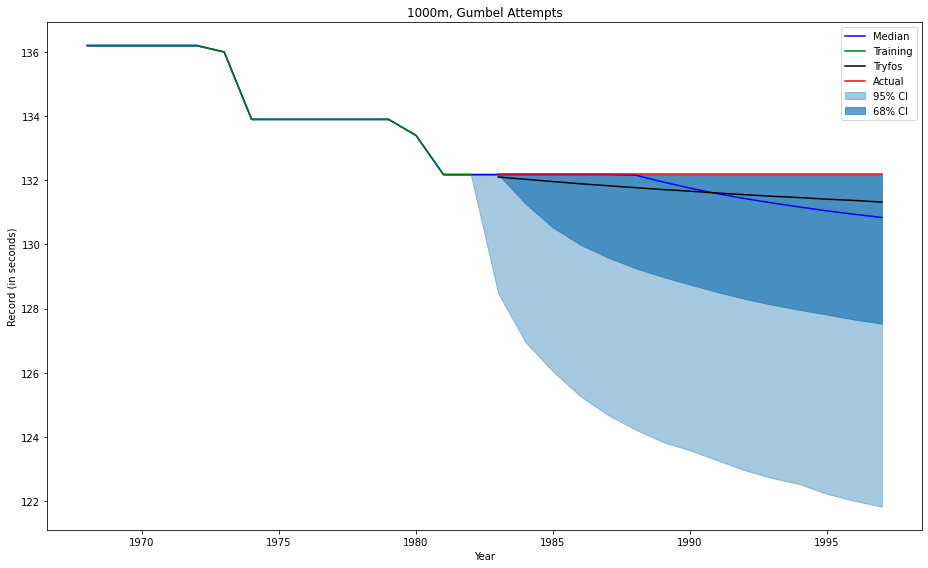

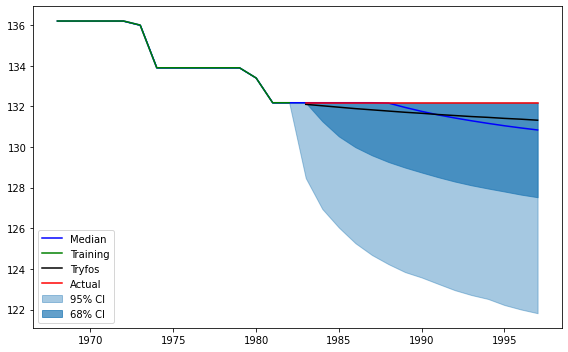

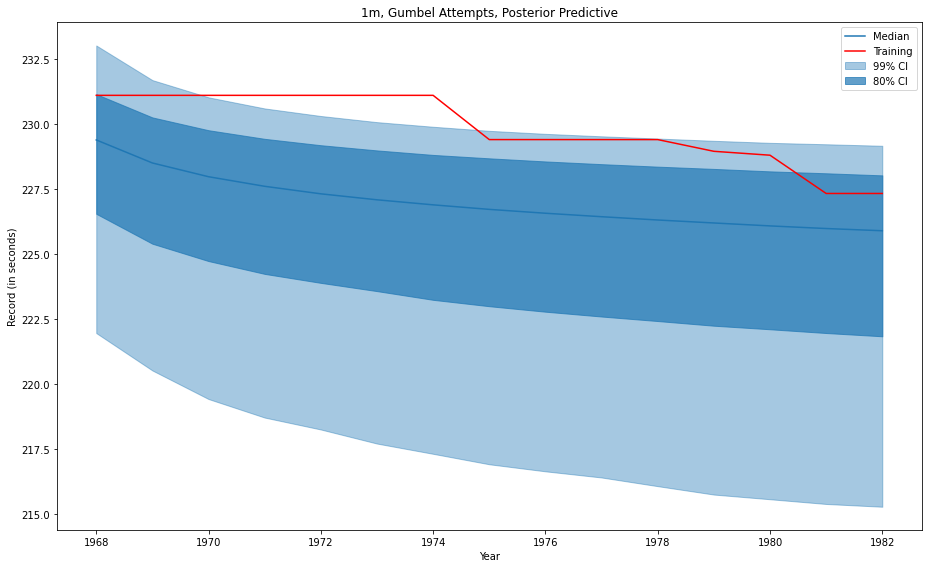

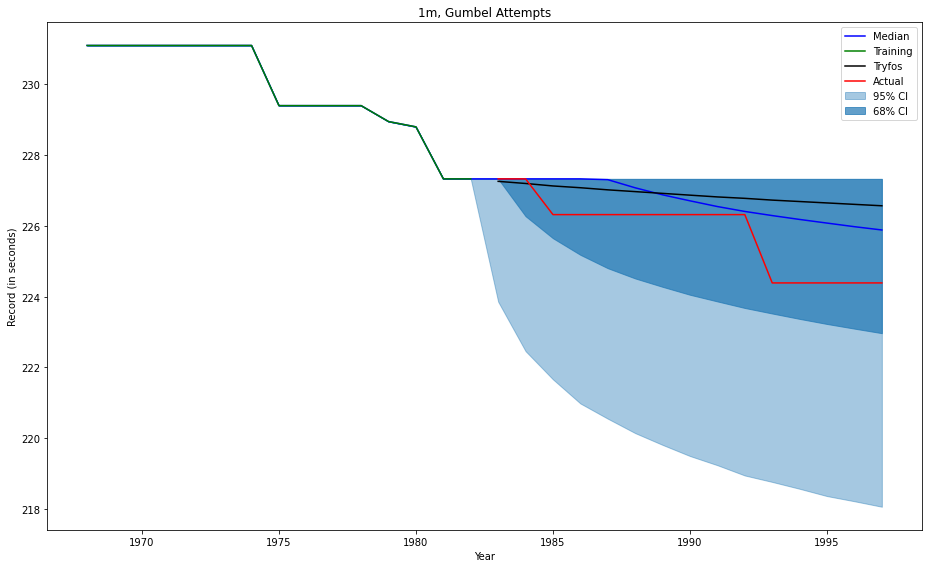

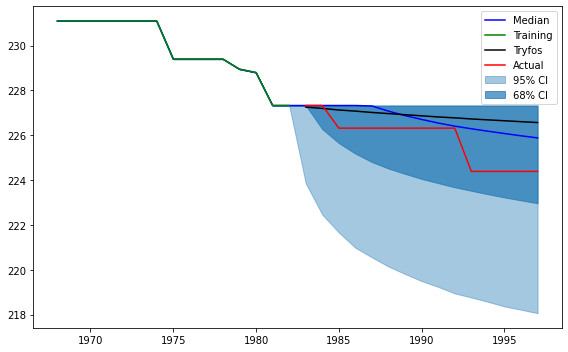

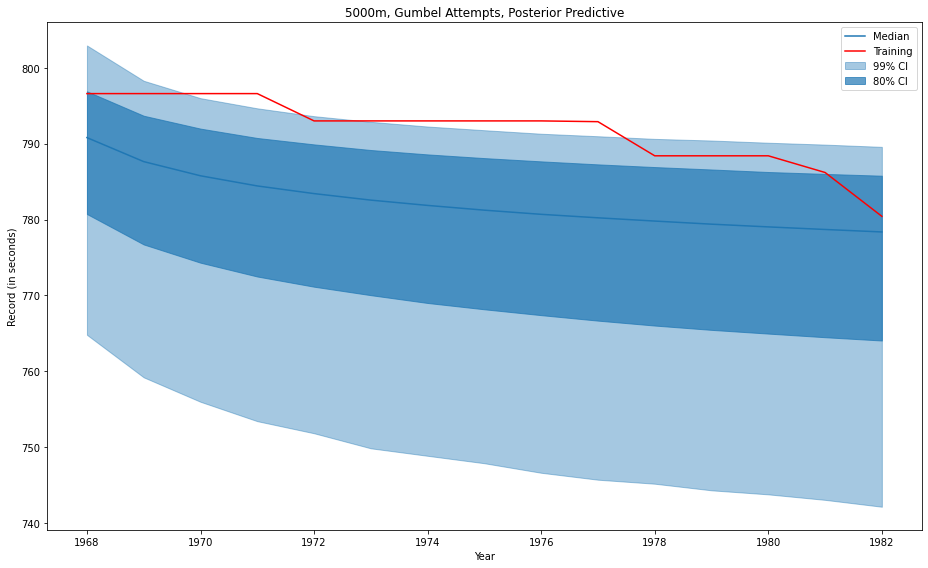

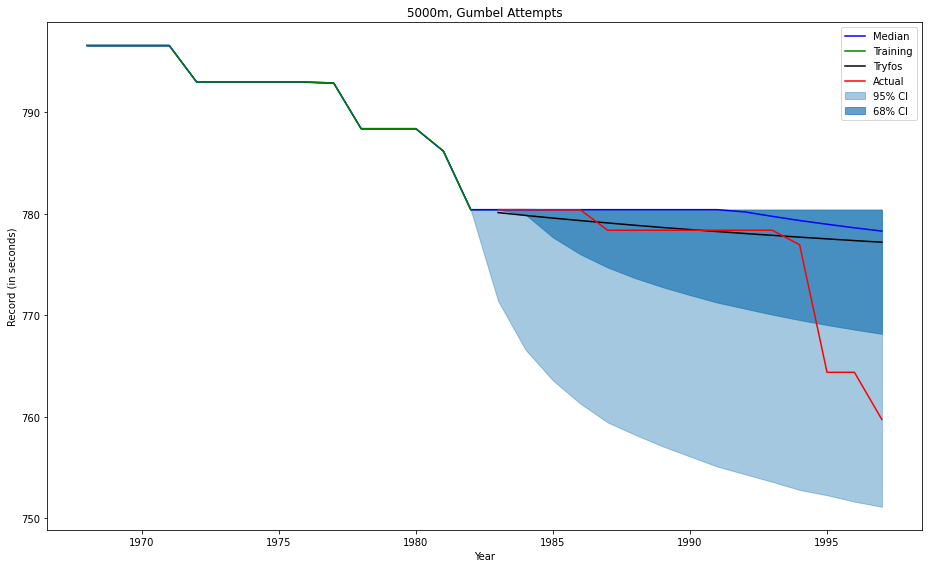

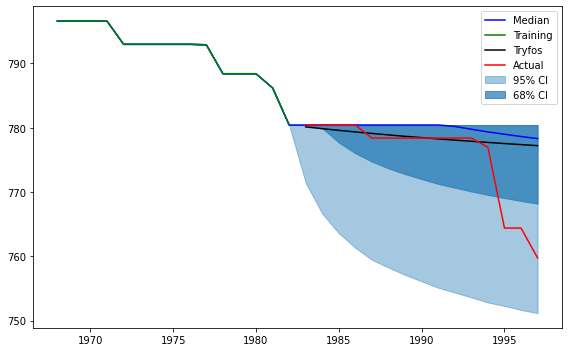

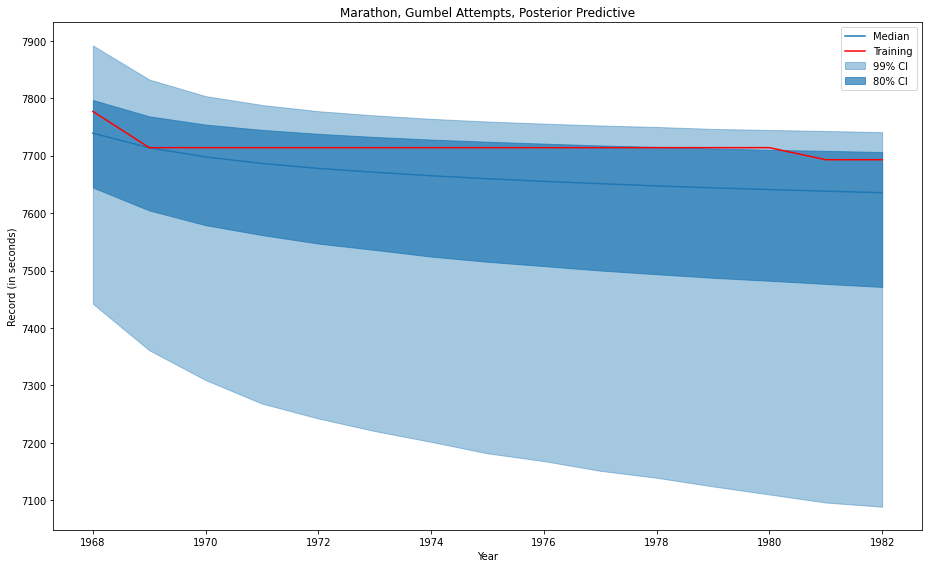

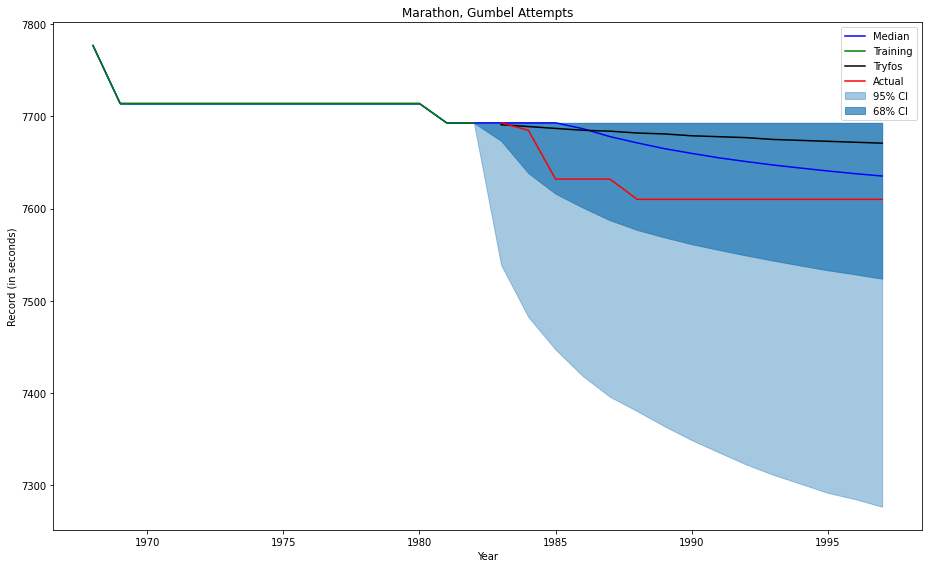

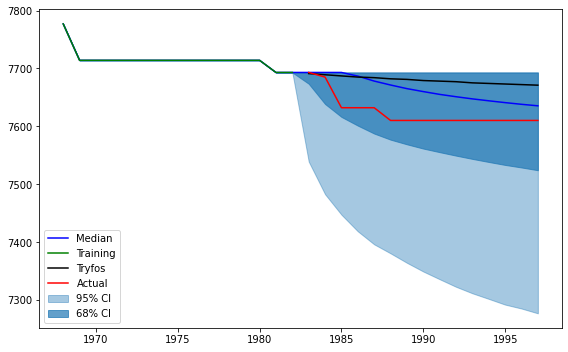

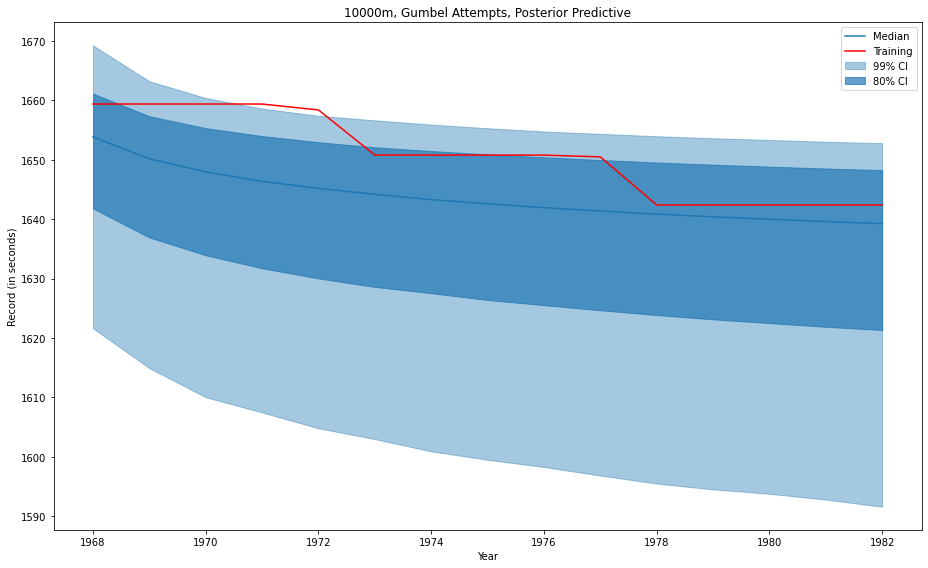

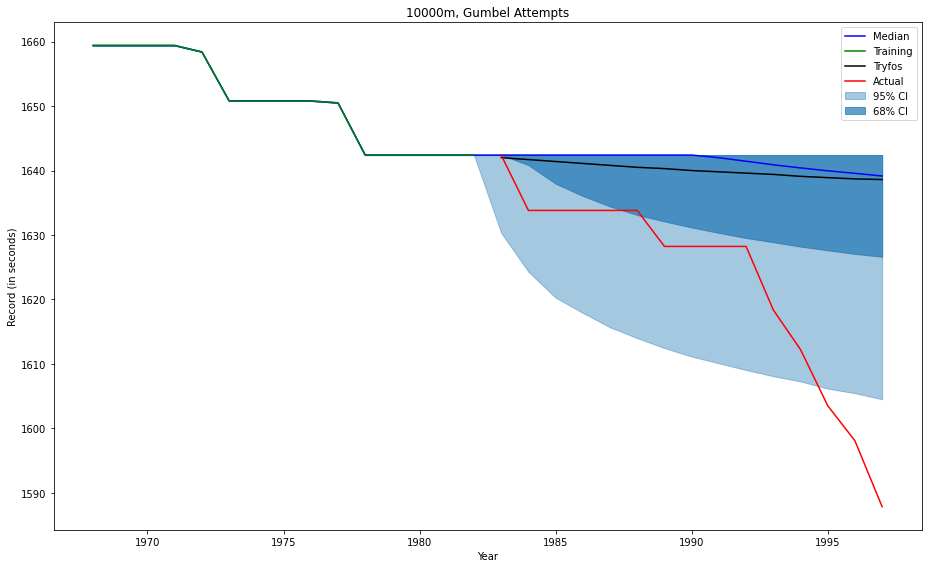

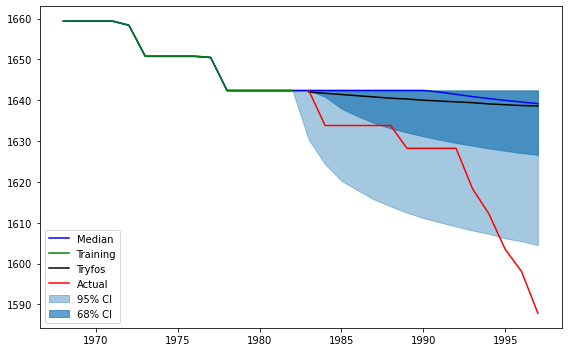

In [13]:
#whiches = ["1m", "5000m", "10000m", "Marathon"]
whiches = ["1000m", "1m", "5000m", "Marathon", "10000m"]
#whiches = []

msesw = {}
avg_log_probsw = {}

fails = []

#whiches = ["1000m"]
for which in whiches:

    try:

        df = pd.read_csv("tryfos_data.csv")
        years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

        training_years = years[:15]
        training_records = records[:15]
        tryfos_years = years[15:]
        tryfos_fcast = records[15:]

        actual_df = pd.read_csv("tryfos_actual.csv")
        _, actual_records = actual_df["Year"].values, actual_df[which].values

        prior_parameters = {
        'alpha' : {
            'lower' : 1e-5,
            'upper' : 10e4,
        },
        'beta' : {
            'lower' : 1e-5,
            'upper': 10e4,
            }
        }

        model = fm.WeibullForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="weibull", 
                            kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)


        model.fit(chains=10, draws=5000)
        model.posterior_predictive()
        model.forecast()


        # MSE calculation
        median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
        bayes_mse = fm.mse(median, model.fcast_test_data)
        tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
        baseline_fcast = training_records[-1]*np.ones_like(model.fcast_test_data)
        baseline_mse = fm.mse(baseline_fcast, model.fcast_test_data)
        msesw[which] = (bayes_mse, tryfos_mse, baseline_mse)

        # Average logp
        avg_log_probsw[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])

        # Plots
        fig = plot_posterior_predictive(model, f"{which}, Gumbel Attempts, Posterior Predictive")
        fig.savefig(f"weibull/final_{which}_weibull_attempts_post_pred.png")

        # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gumbel Attempts, Forecast", actual_records)
        # fig.savefig(f"{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"weibull/final_{which}_weibull_attempts_forecast.png")

        fig = plot_forecast_small(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"weibull/s_final_{which}_weibull_attempts_forecast.png")



    except:
       print(f"Error: failed on {which}")
       fails.append(which)

In [ ]:
msesw = {}
avg_log_probsw = {}

In [14]:
msesw

{'1000m': (0.5062056703198953, 0.30973333333333847, 0.0),
 '1m': (1.2381743845661695, 1.9230733333333596, 3.425253333333406),
 '5000m': (52.79014828609594, 43.3707066666667, 65.49352666666633),
 'Marathon': (1787.0911915971449, 3500.8, 5341.133333333333),
 '10000m': (541.0288858576189, 496.97074666666725, 607.3418133333379)}

In [15]:
avg_log_probsw

{'1000m': -2.8141612309296247,
 '1m': -10.591214414806009,
 '5000m': -35.880003982948374,
 'Marathon': -26.71320617852383,
 '10000m': -77.77677890716176}